# ML with clean SDSS sample using GPU.

---

## Python setup

First, we install and import the packages to be used

We will start with RAPIDS.ai to have access to GPU models.

Click the Runtime dropdown at the top of the page, then Change Runtime Type and confirm the instance type is GPU.
Check the output of !nvidia-smi to make sure you've been allocated a Tesla T4, P4, or P100.

In [ ]:
!nvidia-smi

Wed Jul 21 20:16:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 277 (delta 59), reused 40 (delta 20), pack-reused 171
Receiving objects: 100% (277/277), 80.66 KiB | 7.33 MiB/s, done.
Resolving deltas: 100% (121/121), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:11 https://developer.d

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:34
🔁 Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable core
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.06
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.0
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.06


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20210324.0      |       h9c3ff4c_0        1011 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    anyio-3.2.1                |   py37h89c1867_0         138 KB  conda-forge
    appdirs-1.4.4              |     pyh9f0ad1d_0          13 KB  conda-fo

In [ ]:
# !pip install BorutaShap

!pip install scikit-learn==0.23.2

!pip install "tune-sklearn>=0.2.1"
!pip install "scikit-optimize>=0.8.1"

!pip install ppscore

!pip install sklearn-som
!pip install umap
!pip install trimap
!pip install "pacmap==0.4"

!pip install cmasher
!pip install colorcet
!pip install mpl-scatter-density

# Only for GPU usage
!pip uninstall lightgbm -y
# install lightgbm GPU
!pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

# !pip install --upgrade "xgboost>=1.1.0"
!pip install --upgrade "catboost>=0.23.2"
!pip install --upgrade shap
!pip install pycaret

     |████████████████████████████████| 6.8 MB 8.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
     |████████████████████████████████| 40 kB 5.0 MB/s 
     |████████████████████████████████| 51.6 MB 34 kB/s 
     |████████████████████████████████| 72 kB 637 kB/s 
     |████████████████████████████████| 3.1 MB 44.9 MB/s 
     |████████████████████████████████| 127 kB 68.5 MB/s 
     |████████████████████████████████| 65 kB 4.7 MB/s 
     |████████████████████████████████| 78 kB 9.0 MB/s 
     |████████████████████████████████| 4.2 MB 45.4 MB/s 
     |████████████████████████████████| 10.1 MB 47.5 MB/s 
     |████████████████████████████████| 124 kB 78.1 MB/s 
     |████████████████████████████████| 85 kB 4.9 MB/s 
     |████████████████████████████████| 93 kB 1.7 MB/s 
     |████████████████████████████████| 198 kB 67.6 MB/s 
  Created wheel for gp

     |████████████████████████████████| 101 kB 5.4 MB/s 
     |████████████████████████████████| 47 kB 3.1 MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=c3a9d04ec94bb34924b0ffef81b25e7d8f6df64fd24448b5e2bed810eff4ea35
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=e1592926d5782ff365b662fce1130fb72bd43c5ef0b38621d41e1f4cc112d7d0
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap
     |████████████████████████████████| 5.6 MB 6.7 MB/s 
     |████████████████████████████████| 646 kB 60.7 MB/s 
  Created wheel for trimap: filename=trimap-1.0.15-py3-none-any.whl size=14637 sha256=e833c7168bc32b12c064bbdad3c5f233805e8ff8073b72d3885b51864121b29a
  Stored in directory: /root/.cache/pip/wheels/d2/bc/e3

**Important**: We need to restart Google's runtime for the new packages to be properly linked after installation.

In [ ]:
import os
os._exit(00)

Now, we import the packages. Note that we are not importing some of them because:  
1) We will not use them.  
2) They give conflicts with the GPU configuration (I don't know why).

In [ ]:
%matplotlib inline
# Static plots
#%matplotlib ipympl
# Interactive plots
import copy
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as mpe
from matplotlib.ticker import FuncFormatter
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import mpl_scatter_density
from astropy.table import Table, join
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import plot_confusion_matrix, classification_report
import ppscore as pps
import seaborn as sns
import cmasher as cmr
import colorcet as cc
import getpass
# import pacmap
# import umap
# import trimap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn_som import som
import pandas as pd
import re
import shap
# from BorutaShap import BorutaShap
import pycaret.regression as pyr
# import missingno as msno
import os
import subprocess

Create class to normalize asymmetric colorscales  
(from [http://chris35wills.github.io/matplotlib_diverging_colorbar/](http://chris35wills.github.io/matplotlib_diverging_colorbar/)).

In [ ]:
class MidpointNormalize(mcolors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

For future plots, we can configure their aspect too.

In [ ]:
cmap           = cm.get_cmap('inferno')
cmap_alt       = cm.get_cmap('Dark2')
cmap_alt_2     = cm.get_cmap('Greys_r')  # Shades of grey
cmap_alt_3     = cm.get_cmap('coolwarm')  # blue to red
dark_color     = cmap(0.4)  # RGBA color code
light_color    = cmap(0.6)  # RGBA color code
colors         = [cmap(0.15), cmap(0.30), cmap(0.45), cmap(0.60), cmap(0.75), cmap(0.90)]
colors_3       = [cmap(0.25), cmap(0.50), cmap(0.75)]
colors_3_alt   = [cmap_alt(0.25), cmap_alt(0.50), cmap_alt(0.75)]
colors_3_alt_2 = [cmap_alt_2(0.25), cmap_alt_2(0.50), cmap_alt_2(0.75)]
colors_8       = [cmap(0.12), cmap(0.24), cmap(0.35), cmap(0.48), cmap(0.6), cmap(0.72), cmap(0.84), cmap(0.96)]
colors_8_alt   = [cmap_alt(0.12), cmap_alt(0.24), cmap_alt(0.35), cmap_alt(0.48), cmap_alt(0.6), cmap_alt(0.72),\
                  cmap_alt(0.84), cmap_alt(0.96)]
colors_8_alt_2 = [cmap_alt_2(0.06), cmap_alt_2(0.18), cmap_alt_2(0.29), cmap_alt_2(0.42), cmap_alt_2(0.54),\
                  cmap_alt_2(0.66), cmap_alt_2(0.78), cmap_alt_2(0.90)]
colors_8_alt_3 = [cmap_alt_3(0.06), cmap_alt_3(0.18), cmap_alt_3(0.29), cmap_alt_3(0.42), cmap_alt_3(0.54),\
                  cmap_alt_3(0.66), cmap_alt_3(0.78), cmap_alt_3(0.90)]

In [ ]:
pe1            = [mpe.Stroke(linewidth=5.0, foreground='black'),
                  mpe.Stroke(foreground='white', alpha=1),
                  mpe.Normal()]
pe2            = [mpe.Stroke(linewidth=3.0, foreground='white'),
                  mpe.Stroke(foreground='white', alpha=1),
                  mpe.Normal()]

alp_str        = r'$\alpha$'

Methods to deal with loaded Pycaret models.

In [ ]:
def get_final_column_names(pycaret_pipeline, sample_df):
    for (name, method) in pycaret_pipeline.named_steps.items():
        if method != 'passthrough' and name != 'trained_model':
            print(f'Running {name}')
            sample_df = method.transform(sample_df)
    return sample_df.columns.tolist()

In [ ]:
def get_feature_importances_df(pycaret_pipeline, sample_df, n = 10):
    
    final_cols = get_final_column_names(pycaret_pipeline, sample_df)
    
    try:
        variables = pycaret_pipeline["trained_model"].feature_importances_
        
    except:
        variables = np.mean([
                        tree.feature_importances_ for tree in pycaret_pipeline["trained_model"].estimators_ 
            if hasattr(tree, 'feature_importances_')
                        ], axis=0)
    
    coef_df = pd.DataFrame({'Feature': final_cols, 'Importance': variables})
    sorted_df = (
        coef_df.sort_values(by='Importance', ascending=False)
        .head(n)
        .sort_values(by='Importance', ascending=True).reset_index(drop=True)
    )
    return sorted_df

Define specific metric for redshift values:  

$$
\Delta z = \mathrm{median}\left(\frac{|(z_{True} - z_{Predict})|}{(1 + z_{True})}\right)
$$

In [ ]:
def delta_z(y, y_pred, **kwargs):
    num = np.abs(y - y_pred)
    den = 1 + y
    return np.nanmedian(num / den)

---

## Reading data

First, let's download the fits file with the data.

If we want to use data you have on your GDrive foldes, you can follow the steps of https://medium.com/@acpanjan/download-google-drive-files-using-wget-3c2c025a8b99

In [ ]:
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Pr_slP0EWMSbx0nTc4ttohnKPJGzmiqU' -O SDSSQ_DR16_only_pos_mags.fits

In [ ]:
file_name = 'SDSSQ_DR16_only_pos_mags.fits'  # 4743 objects

In [ ]:
if not os.path.exists(file_name):
    subprocess.run(['wget', '--no-check-certificate',\
                    'https://docs.google.com/uc?export=download&id=1Pr_slP0EWMSbx0nTc4ttohnKPJGzmiqU',\
                    '-O', file_name], check=True, text=True)

In [ ]:
machine  = getpass.getuser()
cat_path = ''  # relative path to the same directory

First, open the file as astropy Table to modify (and standardise)  
the units of fluxes and/or magnitudes.

In [ ]:
large_catalog_full_tab = Table.read(cat_path + file_name, format='fits')

In [ ]:
large_catalog_full_tab.info

<Table length=4743>
   name    dtype 
--------- -------
SDSS_NAME bytes18
       RA float64
      DEC float64
        Z float64
 PSFMAG_u float32
 PSFMAG_g float32
 PSFMAG_r float32
 PSFMAG_i float32
 PSFMAG_z float32
      FUV float64
      NUV float64
   W1_MAG float32
   W2_MAG float32
     JMAG float64
     HMAG float64
     KMAG float64

In [ ]:
zero_point_star_equiv  = u.zero_point_flux(3631.1 * u.Jy)  # zero point (AB) to Jansky

In [ ]:
nmgy_cols = ['FUV', 'NUV']

for col in nmgy_cols:
    large_catalog_full_tab[col].unit        = u.nanomaggy
    large_catalog_full_tab[col + '_MAG'] = u.Magnitude(large_catalog_full_tab[col].to(u.AB, zero_point_star_equiv))
    # large_catalog_full_tab[col] = large_catalog_full_tab[col].to(u.mJy)

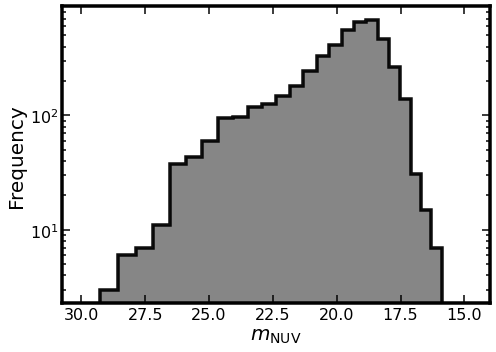

In [ ]:
fig             = plt.figure(figsize=(7,5))
ax1             = fig.add_subplot(111, xscale='linear', yscale='log')

binss = np.logspace(np.nanmin(np.log10(large_catalog_full_tab['NUV_MAG'])),\
                    np.nanmax(np.log10(large_catalog_full_tab['NUV_MAG'])), 30)
ax1.hist(large_catalog_full_tab['NUV_MAG'], bins=binss, fc='Gray', ec='k', histtype='stepfilled', alpha=0.95, lw=3.5);

ax1.tick_params(which='both', top=True, right=True, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
ax1.set_xlabel('$m_{\mathrm{NUV}}$', size=20)
ax1.set_ylabel('Frequency', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
ax1.invert_xaxis()
#ax1.set_xlim(left=0.2, right=2.4)
#ax1.set_aspect('equal', 'box')
fig.tight_layout()

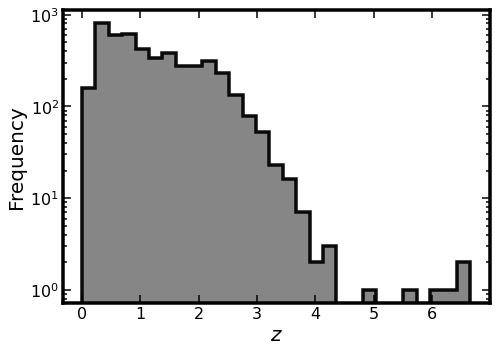

In [ ]:
fig             = plt.figure(figsize=(7,5))
ax1             = fig.add_subplot(111, xscale='linear', yscale='log')

used_col        = 'Z'

bins_z = np.linspace(np.nanmin(large_catalog_full_tab[used_col]),\
                    np.nanmax(large_catalog_full_tab[used_col]), 30)
ax1.hist(large_catalog_full_tab[used_col], bins=bins_z, fc='Gray', ec='k', histtype='stepfilled', alpha=0.95, lw=3.5);

ax1.tick_params(which='both', top=True, right=True, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
ax1.set_xlabel('$z$', size=20)
ax1.set_ylabel('Frequency', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
#ax1.set_xlim(left=0.2, right=2.4)
#ax1.set_aspect('equal', 'box')
fig.tight_layout()

Mask invalid entries in X-ray fluxes.

Many magnitudes in this catalogue are in the Vega system.  
We will transform them into the AB system.

For Vega WISE magnitudes, we have the following conversion to AB values.

Conversion to the AB system (from [WISE documentation](https://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html),  
and [Jarrett et al., 2017](https://ui.adsabs.harvard.edu/abs/2017ApJ...836..182J/abstract))

($m_{\mathrm{AB}} = m_{\mathrm{Vega}} + \Delta (m)$)

|Band | magnitude offset (Δm)|
|-----|---------------------:|
|W1   |                 2.699|
|W2   |                 3.339|
|W3   |                 5.174|
|W4   |                 6.620|

With UKIDSS, we can use the information from [Hewett et al., 2006](https://ui.adsabs.harvard.edu/abs/2006MNRAS.367..454H/abstract)

|Band | magnitude offset (Δm)|
|-----|---------------------:|
|J    |                 0.938|
|H    |                 1.379|
|K    |                 1.900|

Convert `Vega` magnitudes to `AB`.

In [ ]:

vega_cols     = ['W1_MAG', 'W2_MAG', 'JMAG', 'HMAG', 'KMAG']
vega_shift    = {'W1_MAG': 2.699, 'W2_MAG': 3.339, 'JMAG': 0.938, 'HMAG': 1.379, 'KMAG': 1.900}


for col in vega_cols:
    large_catalog_full_tab[col] += vega_shift[col]

Create `pandas` DataFrame from `astropy` table.

In [ ]:

# large_catalog_full_df = large_catalog_full_tab.to_pandas(use_nullable_int=False)
large_catalog_full_df = large_catalog_full_tab.to_pandas()

Create `pandas`DataFrames for redhisft and coordinates.

In [ ]:
redshift_df           = large_catalog_full_df['Z']
coord_ra_deg          = large_catalog_full_df['RA']
coord_dec_deg         = large_catalog_full_df['DEC']

Create `pandas` Series with coordinates.

In [ ]:
# coords_arr            = pd.Series(SkyCoord(coord_ra_deg, coord_dec_deg, unit=u.degree), index=coord_ra_deg.index)

Calculate colours for several pairs of magnitudes in the sample.

In [ ]:
# colours_df                   = pd.DataFrame()
large_catalog_full_df['u_g']            = large_catalog_full_df['PSFMAG_u'] - large_catalog_full_df['PSFMAG_g']
large_catalog_full_df['g_r']            = large_catalog_full_df['PSFMAG_g'] - large_catalog_full_df['PSFMAG_r']
large_catalog_full_df['r_i']            = large_catalog_full_df['PSFMAG_r'] - large_catalog_full_df['PSFMAG_i']
large_catalog_full_df['i_z']            = large_catalog_full_df['PSFMAG_i'] - large_catalog_full_df['PSFMAG_z']
large_catalog_full_df['u_r']            = large_catalog_full_df['PSFMAG_i'] - large_catalog_full_df['PSFMAG_r']  # ~U-V
large_catalog_full_df['g_i']            = large_catalog_full_df['PSFMAG_g'] - large_catalog_full_df['PSFMAG_i']
large_catalog_full_df['w1_w2']          = large_catalog_full_df['W1_MAG']   - large_catalog_full_df['W2_MAG']
large_catalog_full_df['J_H']            = large_catalog_full_df['JMAG']     - large_catalog_full_df['HMAG']
large_catalog_full_df['H_K']            = large_catalog_full_df['HMAG']     - large_catalog_full_df['KMAG']
large_catalog_full_df['FUV_NUV']        = large_catalog_full_df['FUV_MAG']  - large_catalog_full_df['NUV_MAG']

# colours_df.describe()

In [ ]:
np.shape(large_catalog_full_df)

(4743, 28)

## Possible correlations

---

In [ ]:
print(large_catalog_full_df.columns)

Index(['SDSS_NAME', 'RA', 'DEC', 'Z', 'PSFMAG_u', 'PSFMAG_g', 'PSFMAG_r',
       'PSFMAG_i', 'PSFMAG_z', 'FUV', 'NUV', 'W1_MAG', 'W2_MAG', 'JMAG',
       'HMAG', 'KMAG', 'FUV_MAG', 'NUV_MAG', 'u_g', 'g_r', 'r_i', 'i_z', 'u_r',
       'g_i', 'w1_w2', 'J_H', 'H_K', 'FUV_NUV'],
      dtype='object')


In [ ]:
cols2corr = ['Z', 'PSFMAG_u', 'PSFMAG_g', 'PSFMAG_r', 'PSFMAG_i', 'PSFMAG_z', 'FUV_MAG',\
             'NUV_MAG', 'W1_MAG', 'W2_MAG', 'JMAG', 'HMAG', 'KMAG', 'u_g', 'g_r', 'r_i',\
             'i_z', 'u_r', 'g_i', 'w1_w2', 'J_H', 'H_K', 'FUV_NUV']  # From main dataframe (large_catalog_full_df)

In [ ]:
corr_data_df                   = large_catalog_full_df.loc[:, cols2corr]

In [ ]:
corr_data_df.columns

Index(['Z', 'PSFMAG_u', 'PSFMAG_g', 'PSFMAG_r', 'PSFMAG_i', 'PSFMAG_z',
       'FUV_MAG', 'NUV_MAG', 'W1_MAG', 'W2_MAG', 'JMAG', 'HMAG', 'KMAG', 'u_g',
       'g_r', 'r_i', 'i_z', 'u_r', 'g_i', 'w1_w2', 'J_H', 'H_K', 'FUV_NUV'],
      dtype='object')

Scale features for plotting correlations.

In [ ]:
# max_abs_scaler = MaxAbsScaler()
min_max_scaler = MinMaxScaler(feature_range=(0., 1.))
# x_scaled = max_abs_scaler.fit_transform(large_catalog_df.values)
x_scaled = min_max_scaler.fit_transform(corr_data_df.values)
norm_corr_data_df = pd.DataFrame(data=x_scaled, columns=corr_data_df.columns, index=corr_data_df.index) 

Restore redshift values (since they are the target feature).

In [ ]:
norm_corr_data_df['Z'] = corr_data_df['Z']

Let's set a random seed for future aplications.

In [ ]:
seed = 42

---

# Using Pycaret

We will start with the non-normalised data. We will let PyCaret (https://pycaret.org) do it for us.

In order to test more capabilities, we will divide our data into three sub-samples: train, test, and validation sets.  

PyCaret will use tran and test sets and we will let a $10\%$ of the data for final validation (not touched by the models).

PyCaret can take, automatically, a $70\%$ of the data for training and a $30\%$ for testing.

It will also perform most of its training routines using 10-fold CV.

In [ ]:
seed = 42

In [ ]:
data_train_test_df = corr_data_df.sample(frac=0.90, random_state=seed)  # Train + test sets
data_validation_df = corr_data_df.drop(data_train_test_df.index)  # Validation data

print('Shape of used data')
print('-' * 40)
print(f'Full Dataset size: {corr_data_df.shape}')
print(f'Data for Modeling (Train and Test): {data_train_test_df.shape}')
print(f'Unseen Data For Validation: {data_validation_df.shape}')
print('-' * 40)

Shape of used data
----------------------------------------
Full Dataset size: (4743, 23)
Data for Modeling (Train and Test): (4269, 23)
Unseen Data For Validation: (474, 23)
----------------------------------------


---

---

Now, we set PyCaret up. There are several options, and some of them might be different depending on whether we are running regression, classification, or other tasks (https://pycaret.readthedocs.io/en/latest/api/regression.html).

We will let PyCaret select the most relevant features by using the Boruta method (https://danielhomola.com/feature%20selection/phd/borutapy-an-all-relevant-feature-selection-method/).  

Also, we want to normalise our training features (not the target) with zscores (i.e., each feature will have a mean value, mu=0, and a standard deviation, sigma=1).

There are many more options (https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.setup).

**Important**: Note that now we have the parameter `use_gpu='force'`. That makes PyCaret use only the GPU versions of models that have both options (CPU and GPU).

In [ ]:
exp_mclf = pyr.setup(data=data_train_test_df, target='Z', session_id=seed, silent=True,\
                     feature_selection=True, feature_selection_method='boruta',\
                     n_jobs=-1, normalize=True, normalize_method='zscore', use_gpu='force')

,Description,Value
0,session_id,42
1,Target,Z
2,Original Data,"(4269, 23)"
3,Missing Values,False
4,Numeric Features,22
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2988, 20)"


We can see, from the output, that some features have been discarded. This might help our models to run faster.

At this point, we add our custom scoring function for redshifts.

In [ ]:
pyr.add_metric('z_met', 'delta z', delta_z, greater_is_better=False)

Name                                                       delta z
Display Name                                               delta z
Score Function                <function delta_z at 0x7fa12b85a5f0>
Scorer               make_scorer(delta_z, greater_is_better=False)
Target                                                        pred
Args                                                            {}
Greater is Better                                            False
Custom                                                        True
Name: z_met, dtype: object

Just to have more information, we see the models that are available for use in the system.

In [ ]:
pyr.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,cuml.linear_model.linear_regression.LinearRegr...,True
lasso,Lasso Regression,cuml.linear_model.lasso.Lasso,True
ridge,Ridge Regression,cuml.linear_model.ridge.Ridge,True
en,Elastic Net,cuml.linear_model.elastic_net.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


Since we want to take advantage of the GPU, we want to only use models that are installed through RAPIDS.ai. That means, we want those which start with `cuml...` and not those with `sklearn..`. Also we will prefer those which have `Turbo=True`, they are intrinsically faster.

If we want, we can also use `xgboost`, `lightgbm`, and `catboost`. They have the capabilities to use GPU.

Now, instead of looking at some text to understand what models are better for our regression problem and the structure of our data, we can ask PyCaret to, quickly, test many models and select the ones that behave the best for us.

We want to stack (https://en.wikipedia.org/wiki/Ensemble_learning#Stacking) the five best models, so we are selecting them directly from the comparison. Also, some models are excluded from this task since, from previous runs, they behave really bad.

In [ ]:
# Catboost uses GPU only if rows > 50000
gpu_ready_models = ['lr', 'ridge', 'svm', 'knn', 'rf', 'xgboost', 'lightgbm', 'catboost']

# top5 = pyr.compare_models(n_select=5, exclude=['huber', 'lar', 'llar', 'lasso', 'en'], sort='z_met')
top5 = pyr.compare_models(n_select=5, include=gpu_ready_models, sort='z_met')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,delta z,TT (Sec)
knn,K Neighbors Regressor,0.1667,0.1076,0.3202,0.8312,0.1350,0.3397,0.0365,0.171
rf,Random Forest Regressor,0.1735,0.1143,0.3315,0.8201,0.1411,0.3719,0.0378,0.579
lightgbm,Light Gradient Boosting Machine,0.1780,0.1048,0.3156,0.8353,0.1358,0.3792,0.0495,1.131
svm,Support Vector Regression,0.1799,0.1009,0.3101,0.8418,0.1309,0.3769,0.0510,0.218
xgboost,Extreme Gradient Boosting,0.1916,0.1188,0.3395,0.8132,0.1438,0.3991,0.0522,1.088
catboost,CatBoost Regressor,0.1922,0.1073,0.3203,0.8317,0.1392,0.3986,0.0594,8.366
lr,Linear Regression,0.2936,0.1770,0.4167,0.7211,0.1883,0.5640,0.1019,0.808
ridge,Ridge Regression,0.2936,0.1770,0.4167,0.7211,0.1883,0.5640,0.1019,0.013


At this step, we let PyCaret stack the models we have just selected. The best model will be used as meta model, using the outputs of the other four models as new features.

In [ ]:
pyr_stacked = pyr.stack_models(estimator_list=top5[1:], meta_model=top5[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE,delta z
0,0.1332,0.0697,0.2639,0.8867,0.1149,0.1528,0.0287
1,0.1457,0.1511,0.3887,0.7687,0.1355,0.1505,0.0339
2,0.1285,0.0604,0.2457,0.9096,0.1001,0.1251,0.0320
3,0.1483,0.0715,0.2674,0.8885,0.1308,0.2500,0.0328
4,0.1639,0.2096,0.4578,0.6876,0.1597,0.1623,0.0351
5,0.1510,0.0812,0.2849,0.8757,0.1358,1.5791,0.0338
6,0.1411,0.0705,0.2655,0.8676,0.1245,0.2012,0.0325
7,0.1434,0.0790,0.2811,0.8700,0.1311,0.2098,0.0319
8,0.1198,0.0463,0.2152,0.9250,0.0999,0.1467,0.0337
9,0.1263,0.0507,0.2252,0.9232,0.0984,0.1530,0.0288


If we didn't want to stack models, we could have just used the best-performing model.

In [ ]:
# pyr_model  = top5[0]

Now, we can tune the hyperparameters of the selected (stacked) model. This step should take quite a long time.  

In the case of classification, I recommend using `optimize='MCC'`. That metric works better with heavily unbalanced data.

In [ ]:
tuned_stacked = pyr.tune_model(pyr_stacked, early_stopping='asha', optimize='z_met')

,MAE,MSE,RMSE,R2,RMSLE,MAPE,delta z
0,0.1211,0.0520,0.2280,0.9154,0.1026,0.1405,0.0283
1,0.1357,0.1463,0.3825,0.7761,0.1300,0.1396,0.0322
2,0.1260,0.0663,0.2574,0.9008,0.1054,0.1242,0.0278
3,0.1423,0.0612,0.2473,0.9046,0.1180,0.2172,0.0336
4,0.1691,0.2132,0.4617,0.6822,0.1619,0.1757,0.0335
5,0.1482,0.0763,0.2762,0.8832,0.1349,1.5619,0.0351
6,0.1332,0.0703,0.2651,0.8680,0.1199,0.1828,0.0298
7,0.1360,0.0785,0.2801,0.8710,0.1322,0.2144,0.0277
8,0.1141,0.0451,0.2125,0.9269,0.1009,0.1541,0.0291
9,0.1188,0.0440,0.2097,0.9333,0.0884,0.1385,0.0290


After being tuned, we can see the model's properties. We can see PyCaret configurations, the meta-model parameters and the individual estimators' parameters as well.

In [ ]:
print(tuned_stacked)

StackingRegressor(cv=KFold(n_splits=10, random_state=RandomState(MT19937) at 0x7FA10212A160,
   shuffle=False),
                  estimators=[('rf', RandomForestRegressor()),
                              ('lightgbm',
                               LGBMRegressor(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0, device='gpu',
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_s...
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
         

We can check how our model is doing, letting PyCaret prepare some plots (https://pycaret.org/plot-model/). Of course, we can also do it by ourselves.

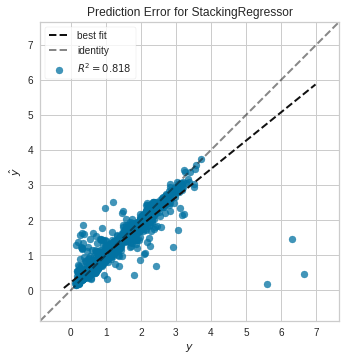

In [ ]:
pyr.plot_model(tuned_stacked, plot='error')

In [ ]:
# !pip install --upgrade yellowbrick

In [ ]:
pyr.plot_model(tuned_stacked, plot='residuals')

IntProgress(value=0, description='Processing: ', max=5)

Finished loading model, total used 100 iterations


YellowbrickValueError: ignored

If we are satisfied with the results, we can finalise the model. That means, to include the test data into the training set and re-run the models and optimise their parameters.

In [ ]:
final_stacked = pyr.finalize_model(tuned_stacked)

Let's check its parameters:

In [ ]:
print(final_stacked)

StackingRegressor(cv=KFold(n_splits=10, random_state=RandomState(MT19937) at 0x7FA1003AA9E0,
   shuffle=False),
                  estimators=[('rf', RandomForestRegressor()),
                              ('lightgbm',
                               LGBMRegressor(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0, device='gpu',
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_s...
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
         

---

The model and PyCaret configuration files can be saved and/or downloaded for future use (to avoid extra running time.)  


**Important** Now that models take a lot of time to run and train, it is recommended to save the files (following lines), download them, and put them in some place you can obtain them easily (e.g., Google Drive). That way, you might save some time if you need to stop working for some time, avoiding running everything again.

In [ ]:
pyr.save_model(final_stacked, 'model_final_SDSS_z')  # Model (it will be saved with .pkl extension)
pyr.save_config('config_final_SDSS_z')  # Configuration file

Transformation Pipeline and Model Successfully Saved


Now, if we want to load the saved files, we can do it.

In [ ]:
# if not os.path.exists('config_final_SDSS_z'):
#     # Run your code to get the file

In [ ]:
# if not os.path.exists('model_final_SDSS_z.pkl'):
#     # Run your code to get the file

In [ ]:
pyr.load_config('config_final_SDSS_z')

In [ ]:
final_stacked = pyr.load_model('model_final_SDSS_z')

Transformation Pipeline and Model Successfully Loaded


---

Now that our model is complete, we can apply it to the validation set.

First, we can just apply it, without saving the results. That way, we can obtain some statistics on the model.

In [ ]:
pyr.predict_model(final_stacked, data=data_validation_df)

,Z,PSFMAG_u,PSFMAG_g,PSFMAG_r,PSFMAG_i,PSFMAG_z,FUV_MAG,NUV_MAG,W1_MAG,W2_MAG,JMAG,HMAG,KMAG,u_g,g_r,r_i,i_z,u_r,g_i,w1_w2,J_H,H_K,FUV_NUV,Label
4,0.307457,19.738922,19.174831,18.684092,18.569454,18.129286,22.346468,21.036074,16.927895,16.493908,18.320000,17.448000,17.036000,0.564091,0.490740,0.114637,0.440168,-0.114637,0.605377,0.433987,0.872000,0.412001,1.310394,0.610793
16,0.921844,18.032793,18.182171,17.774267,17.897682,17.834732,19.172755,18.337662,16.536222,15.785954,17.376999,17.326000,17.066000,-0.149378,0.407904,-0.123415,0.062950,0.123415,0.284489,0.750268,0.051000,0.259999,0.835093,1.093227
34,0.259557,18.562349,18.528749,18.393641,18.335747,17.887615,19.323493,19.477445,16.581633,16.210674,17.629000,17.290000,17.021000,0.033600,0.135109,0.057894,0.448132,-0.057894,0.193003,0.370958,0.339000,0.269000,-0.153953,0.304411
64,1.868676,18.909988,18.805210,18.451227,18.031166,17.871866,20.886377,20.940173,17.406992,16.891535,17.643000,17.297000,17.597000,0.104778,0.353983,0.420061,0.159300,-0.420061,0.774044,0.515457,0.346000,-0.299999,-0.053796,1.872218
98,1.877000,20.168509,19.650352,19.128874,18.555935,18.318344,23.931509,23.081542,17.307024,16.652020,17.900999,18.379000,17.560000,0.518156,0.521479,0.572939,0.237591,-0.572939,1.094418,0.655005,-0.478001,0.819000,0.849967,1.407639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4694,0.279411,18.025873,17.880335,17.511271,17.485350,16.847416,24.200142,24.687045,15.291117,14.848494,17.250000,16.683000,16.500000,0.145538,0.369064,0.025921,0.637934,-0.025921,0.394985,0.442623,0.567000,0.183000,-0.486903,0.427834
4697,0.890832,18.610174,18.375771,18.210154,18.295279,18.234514,20.709547,18.924801,17.540905,17.100338,17.626999,17.734000,17.937001,0.234404,0.165617,-0.085125,0.060764,0.085125,0.080492,0.440567,-0.107000,-0.203001,1.784746,0.936276
4729,0.439592,19.005405,18.895096,18.898268,18.760256,18.478401,19.519502,19.303298,16.919250,16.601950,18.261999,17.806000,17.375000,0.110310,-0.003172,0.138012,0.281855,-0.138012,0.134840,0.317301,0.455999,0.431000,0.216204,0.447841
4735,1.415235,18.609880,18.312334,18.016172,17.885984,17.873287,22.005297,20.078618,17.217295,16.541204,17.860001,17.558001,17.480000,0.297546,0.296162,0.130188,0.012697,-0.130188,0.426350,0.676090,0.302000,0.078001,1.926679,1.420913


This time, let's save the values. The column **Label** has the predictions.

In [ ]:
unseen_predictions = pyr.predict_model(final_stacked, data=data_validation_df)

We can get some basic statistics.

In [ ]:
unseen_predictions[['Z', 'Label']].describe()

,Z,Label
count,474.000000,474.000000
mean,1.224870,1.194677
std,0.827325,0.751356
min,0.073000,0.196903
25%,0.499638,0.549526
50%,1.039792,1.044979
75%,1.746000,1.657799
max,4.852848,3.562950


And, of course, we can also get a plot comparing our results.

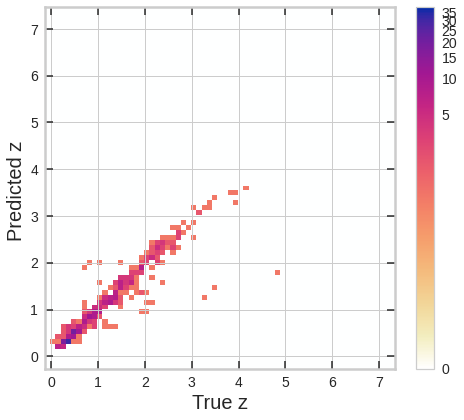

In [ ]:
fig             = plt.figure(figsize=(7,6))
ax1             = fig.add_subplot(111, projection='scatter_density')


norm = ImageNormalize(vmin=0., vmax=39, stretch=LogStretch())

dens_1 = ax1.scatter_density(unseen_predictions.loc[:, 'Z'].sample(frac=1, random_state=seed),\
            unseen_predictions.loc[:, 'Label'].sample(frac=1, random_state=seed),\
            cmap=plt.get_cmap('cet_CET_L17'), zorder=0, dpi=15, norm=norm, alpha=1)

clb = plt.colorbar(dens_1)
clb.ax.tick_params(labelsize=14)
clb.outline.set_linewidth(2.5)
clb.ax.set_ylabel('Points per pixel', size=20, path_effects=pe2)

ax1.set_xlabel('True z', fontsize=20)
ax1.set_ylabel('Predicted z ', fontsize=20)
ax1.tick_params(which='both', top=True, right=True, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
plt.setp(ax1.spines.values(), linewidth=2.5)
plt.setp(ax1.spines.values(), linewidth=2.5)
ax1.set_xlim(left=-0.3, right=7.5)
ax1.set_ylim(bottom=-0.3, top=7.5)
ax1.grid(zorder=0)
ax1.set_aspect('equal', 'datalim')
fig.tight_layout()

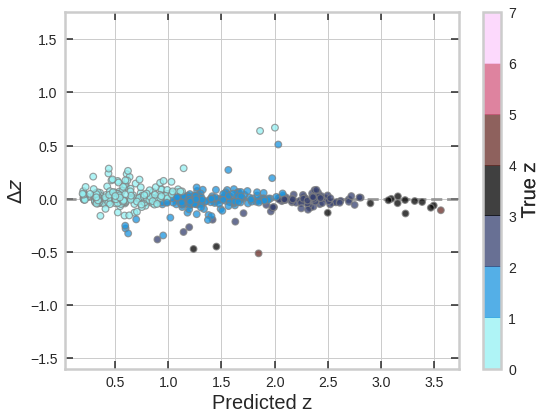

In [ ]:
fig             = plt.figure(figsize=(8,6))
ax1             = fig.add_subplot(111)

norm_z = mcolors.Normalize(vmin=0, vmax=7)

res_z_z     = unseen_predictions.loc[:, 'Label'] - unseen_predictions.loc[:, 'Z']
delt_z      = res_z_z / (1 + unseen_predictions.loc[:, 'Z'])

sc_p = ax1.scatter(unseen_predictions.loc[:, 'Label'].sample(frac=1, random_state=seed),\
                   delt_z.sample(frac=1, random_state=seed),\
                   c=unseen_predictions.loc[:, 'Z'].sample(frac=1, random_state=seed),\
                   s=45, ec='Gray', alpha=0.75, lw=1.2,\
                   cmap=plt.get_cmap('cmr.redshift', 7), zorder=10, norm=norm_z)
ax1.axhline(y=0, ls='--', marker=None, c='Gray', alpha=0.7, lw=3.0)

clb             = plt.colorbar(sc_p)
clb.ax.tick_params(labelsize=14)
clb.outline.set_linewidth(2.5)
clb.ax.set_ylabel('True z', size=20, path_effects=pe2)

ax1.set_xlabel('Predicted z', fontsize=20)
ax1.set_ylabel('$\Delta z$', fontsize=20)
ax1.tick_params(which='both', top=True, right=True, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
plt.setp(ax1.spines.values(), linewidth=2.5)
plt.setp(ax1.spines.values(), linewidth=2.5)
ax1.grid(zorder=0)
ax1.set_aspect('equal', 'datalim')
fig.tight_layout()